# Analysis of FIFA 20 Data Using Clustering Models 

In this notebook we will analyse FIFA 20 data and create clustering models to sort players into clusters based on their skill attributes, and look into how these clustering models perform compared to grouping players by their position. 

## Overview of Data

The dataset contains data about football players from FIFA 20. Each row is a summary of a player's stats with a row for each player. Among the stats you can find age, height, nationality, overall rating and more. The dataset covers 18277 players with 104 different columns relating to their attributes. This dataset was downloaded from Kaggle.

## Cleaning the Data

First we import the necessary libraries:

In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\samke\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


We then set the option to view all columns and rows of a dataset and save the data as a DataFrame named 'df':

In [28]:
pd.set_option('max_columns', None) #View all columns in dataset
pd.set_option('max_rows', None) #View all rows in dataset
df = pd.read_csv('players_20.csv') 

We want to extract only the skill attributes columns as well as height and weight, so we create a DataFrame of the columns of the dataset so that we can easily view the index number of each column:

In [29]:
cols = df.columns.tolist()
df_col = pd.DataFrame(cols).rename(columns = {0:'Columns'})
df_col

,Columns
0,sofifa_id
1,player_url
2,short_name
3,long_name
4,age
5,dob
6,height_cm
7,weight_kg
8,nationality
9,club


In [30]:
df2 = pd.concat([df.iloc[:,6:8], df.iloc[:,44:78], df.iloc[:,24]], axis = 1)
df2.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position
0,170,72,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,RW
1,187,83,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,LW
2,175,68,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,CAM
3,188,87,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,175,74,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,LW


Similarly to in the FIFA 20 Classification notebook, we rename the 'team_position' column to 'pos' and remove all 'SUB' and 'RES' entries as well as entries with null values:

In [31]:
df2 = df2.rename(columns = {'team_position' : 'pos'})
df2 = df2[df2['pos'] != 'SUB']
df2 = df2[df2['pos'] != 'RES']
df2.dropna(inplace = True)
df2.reset_index(inplace = True, drop = True)


In [32]:
df2.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos
0,170,72,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,RW
1,187,83,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,LW
2,175,68,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,CAM
3,188,87,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,175,74,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,LW


We can then create a correlation matrix to view the correlation of every feature:

In [33]:
float_columns = [x for x in df2.columns if x not in ['pos']]

corr_mat = df2[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
height_cm,0.000000,0.772650,-0.536737,-0.388422,0.065840,-0.393054,-0.362646,-0.520077,-0.474389,-0.426714,-0.355408,-0.447890,-0.581181,-0.485769,-0.678414,-0.037685,-0.797428,-0.200815,-0.039327,-0.333731,0.567989,-0.410027,-0.035395,-0.052813,-0.463264,-0.407317,-0.335707,-0.168841,-0.061851,-0.055705,-0.056676,0.333929,0.332883,0.329886,0.335127,0.333542
weight_kg,0.772650,0.000000,-0.466090,-0.321600,0.069329,-0.339775,-0.290619,-0.457763,-0.396850,-0.348680,-0.305621,-0.389492,-0.530216,-0.444904,-0.609996,0.042933,-0.688437,-0.097747,0.012276,-0.295842,0.616930,-0.327096,0.012227,-0.059258,-0.395342,-0.340173,-0.255709,-0.096212,-0.066237,-0.064591,-0.068858,0.320048,0.318415,0.314412,0.319645,0.320963
attacking_crossing,-0.536737,-0.466090,0.000000,0.659714,0.393443,0.791196,0.671546,0.859541,0.832953,0.736794,0.728045,0.832003,0.647138,0.613342,0.684147,0.296407,0.634095,0.499856,0.047178,0.651995,-0.154893,0.735633,0.396844,0.361318,0.782968,0.662353,0.634908,0.523525,0.372249,0.364416,0.345944,-0.652529,-0.650807,-0.650476,-0.652972,-0.653580
attacking_finishing,-0.388422,-0.321600,0.659714,0.000000,0.399804,0.657100,0.885148,0.819411,0.758593,0.701873,0.501932,0.780192,0.564820,0.545422,0.620021,0.296006,0.517638,0.715621,0.009194,0.492109,-0.076991,0.874445,0.207169,-0.074179,0.893425,0.693648,0.824251,0.524233,-0.037767,-0.076064,-0.117061,-0.557365,-0.556655,-0.552632,-0.557285,-0.555792
attacking_heading_accuracy,0.065840,0.069329,0.393443,0.399804,0.000000,0.608100,0.427740,0.489533,0.364038,0.324103,0.479996,0.610600,0.199039,0.256876,0.130262,0.218377,0.073242,0.279572,0.335588,0.579014,0.501303,0.421431,0.692909,0.524860,0.451900,0.155602,0.476739,0.457395,0.566092,0.544042,0.520092,-0.741782,-0.742157,-0.737892,-0.738903,-0.741795
attacking_short_passing,-0.393054,-0.339775,0.791196,0.657100,0.608100,0.000000,0.678580,0.845101,0.756281,0.706135,0.884775,0.914662,0.500966,0.478866,0.558095,0.410958,0.522807,0.530574,0.119149,0.709032,0.058743,0.748964,0.581200,0.520049,0.747079,0.668719,0.671408,0.672700,0.536536,0.520775,0.483678,-0.749297,-0.747976,-0.743283,-0.746578,-0.749296
attacking_volleys,-0.362646,-0.290619,0.671546,0.885148,0.427740,0.678580,0.000000,0.795066,0.789796,0.736724,0.540982,0.776112,0.517670,0.494585,0.588202,0.358018,0.499405,0.728627,0.031520,0.492094,-0.049487,0.860144,0.272250,0.015768,0.843019,0.684372,0.816070,0.580770,0.039809,0.005150,-0.035802,-0.550745,-0.549860,-0.546518,-0.549685,-0.550728
skill_dribbling,-0.520077,-0.457763,0.859541,0.819411,0.489533,0.845101,0.795066,0.000000,0.837652,0.737712,0.710793,0.939076,0.707638,0.678778,0.734688,0.304769,0.655493,0.587451,0.055670,0.681164,-0.116069,0.835694,0.404038,0.253090,0.895189,0.708244,0.748735,0.585155,0.285296,0.263312,0.232034,-0.741074,-0.740185,-0.736160,-0.741460,-0.742606
skill_curve,-0.474389,-0.396850,0.832953,0.758593,0.364038,0.756281,0.789796,0.837652,0.000000,0.852934,0.685580,0.817197,0.569868,0.527566,0.656003,0.349138,0.590075,0.654908,0.014688,0.569267,-0.136860,0.829718,0.340579,0.218596,0.810320,0.726817,0.743689,0.585266,0.230838,0.211738,0.180561,-0.584409,-0.584453,-0.581706,-0.585599,-0.585598
skill_fk_accuracy,-0.426714,-0.348680,0.736794,0.701873,0.324103,0.706135,0.736724,0.737712,0.852934,0.000000,0.669855,0.737572,0.44292

We can also look into the top correlated feature for each feature:

In [34]:
corr_mat.abs().idxmax()

height_cm                               movement_balance
weight_kg                                      height_cm
attacking_crossing                       skill_dribbling
attacking_finishing                mentality_positioning
attacking_heading_accuracy          goalkeeping_handling
attacking_short_passing               skill_ball_control
attacking_volleys                    attacking_finishing
skill_dribbling                       skill_ball_control
skill_curve                            skill_fk_accuracy
skill_fk_accuracy                            skill_curve
skill_long_passing               attacking_short_passing
skill_ball_control                       skill_dribbling
movement_acceleration              movement_sprint_speed
movement_sprint_speed              movement_acceleration
movement_agility                   movement_acceleration
movement_reactions                   mentality_composure
movement_balance                               height_cm
power_shot_power               

We can look into which features are heavily skewed and log transform these to make them more normally distributed:

In [35]:
skew_columns = (df2[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

goalkeeping_reflexes       2.774943
goalkeeping_diving         2.764701
goalkeeping_positioning    2.763385
goalkeeping_kicking        2.759379
goalkeeping_handling       2.753850
dtype: float64

In [36]:
for col in skew_columns.index.tolist():
    df2[col] = np.log1p(df2[col])

We then standardise our data:

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df2[float_columns] = sc.fit_transform(df2[float_columns])

df2.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,RW
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,LW
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,CAM
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,GK
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,LW


## Fitting Our Clustering Models

We can already see from our data that goalkeepers have vastly different stats to outfield players, so we would expect that a clustering method of two clusters would split the players into goalkeepers and outfield players. We first test this by replacing the 'pos' value for every outfield player to 'OUT': 

In [38]:
df3 = df2.copy()

In [39]:
for pos in df3['pos']:
    if pos in ['GK']:
        continue
    else:
        df3['pos'].replace(pos, 'OUT', inplace = True)

In [40]:
df3.pos.value_counts()

OUT    6598
GK      662
Name: pos, dtype: int64

We can plot a pairplot graph to clearly visualise the distinction in skill attributes for goalkeepers and outfield players: 

In [ ]:
sns.pairplot(df3[float_columns + ['pos']], 
             hue='pos')

## K-Means Clustering

In [41]:
df4 = df3.copy()

We then fit a k-means clustering model with two clusters, and add the cluster number as a column to the dataframe:

In [42]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(df4[float_columns])

df4['kmeans'] = km.predict(df4[float_columns])

By looking at the first five entries, we can see that it has separated the one goalkeeper and four outfield players into the two separate clusters:

In [43]:
df4.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,OUT,0
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,OUT,0
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,OUT,0
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,GK,1
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,OUT,0


We can see that the clustering model has split the players into goalkeepers and outfield players as expected: 

In [44]:
(df4[['pos','kmeans']]
 .groupby(['kmeans','pos'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

,,count
kmeans,pos,
0,OUT,6598
1,GK,662


We can also use K-means clustering to cluster the dataset into four clusters, and see how this compares to four standard positions in football, i.e. goalkeeper, defender, midfielder and forward. First we group the 'pos' column into these four positions:  

In [45]:
df5 = df2.copy()

In [46]:
for pos in df5['pos']:
    if pos in ['LCB', 'RCB','CB', 'RB', 'LB', 'RWB', 'LWB']:
        df5['pos'].replace(pos, 'DF', inplace = True)
    elif pos in ['CM', 'LCM', 'RCM', 'RM', 'LM', 'CAM', 'RAM', 'LAM', 'RDM', 'CDM', 'LDM']:
        df5['pos'].replace(pos, 'MD', inplace = True)
    elif pos in ['LS', 'RS', 'RW', 'LW', 'CF', 'LF', 'RF', 'ST']:
        df5['pos'].replace(pos, 'FW', inplace = True)

In [47]:
df5.pos.value_counts()

MD    2719
DF    2656
FW    1223
GK     662
Name: pos, dtype: int64

We then fit our K-means model now with four clusters: 

In [48]:
km = KMeans(n_clusters=4, random_state=42)
km = km.fit(df5[float_columns])

df5['kmeans'] = km.predict(df5[float_columns])

We can already see from our first 10 entries that the players have not consistently been clustered by their position:

In [49]:
df5.head(10)

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,FW,3
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,FW,3
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,MD,3
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,GK,1
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,FW,3
5,-0.073350,-0.832290,2.184521,1.739204,-0.022568,2.190654,2.038230,1.516498,1.829469,2.030712,2.379447,1.857999,0.778554,0.701712,0.883513,3.159478,0.810286,2.275950,-0.331781,1.431952,0.486423,2.063462,0.954759,0.485948,1.801094,2.671432,1.804514,2.663626,0.849160,0.289962,0.078830,0.327189,0.099541,-1.348536,-0.302477,0.094681,MD,0
6,0.821389,1.288405,-1.939217,-1.749181,-2.608343,-0.090713,-1.750556,-2.062466,-1.751276,-1.893377,0.446913,-2.039044,-1.901305,-1.114384,-1.973266,2.543817,-1.531289,0.365333,1.004268,-2.187535,0.829505,-2.099443,-1.025718,-1.430260,-2.173387,0.950254,-1.629902,0.692093,-1.330057,-1.810635,-1.852251,3.184586,3.185794,3.282152,3.217070,3.194274,GK,1
7,1.716128,2.278063,-0.014806,0.200210,1.799228,1.160359,-0.023315,0.635522,0.493370,1.312217,1.689256,0.899710,0.572411,0.911261,-0.301005,2.790082,-0.821721,1.511704,1.922801,0.493566,2.030293,0.710518,1.314846,1.861687,-0.315189,0.591675,0.723309,2.475861,2.014788,1.877080,1.680214,0.104845,-0.310469,0.106321,-0.156003,-0.160584,DF,0
8,-1.415458,-1.397809,1.799639,1.226206,-0.022568,2.190654,1.703925,1.571559,1.829469,1.754368,2.172390,1.921885,0.778554,0.352463,1.858999,2.913214,2.016552,1.358854,0.085734,1.163842,-0.885906,1.647171,0.114557,1.517752,1.336544,2.456285,1.995315,2.757509,0.849160,1.130201,1.020821,0.104845,-0.472510,-0.854570,0.219637,-0.462497,MD,0
9,-0.968088,-0.690910,1.414757,2.149602,0.212502,1.601914,1.871078,1.681681,1.722581,1.256948,1.275142,1.730227,1.946699,1.819309,1.789321,3.282610,1.661768,1.435279,0.169237,1.163842,0.400653,1.751244,0.174571,0.19

In [50]:
df5.kmeans.value_counts()

0    2511
3    2152
2    1935
1     662
Name: kmeans, dtype: int64

Looking closer into the clusters, we can see that while all goalkeepers have exclusively been put into cluster 3, clusters 0, 1 and 2 have a mixture of defenders, midfielders and forwards. This was to be expected given the difference of playstyles between players within these positions. However, due to how the positions are split by cluster, we can assume that cluster 0 contains more attacking players, cluster 2 contains more defensive players and cluster 1 contains more all-rounded players. 

In [51]:
(df5[['pos','kmeans']]
 .groupby(['kmeans','pos'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

count
kmeans pos       
0      DF     996
       FW      71
       MD    1444
1      GK     662
2      DF    1638
       FW      35
       MD     262
3      DF      22
       FW    1117
       MD    1013

We can fit over a range of values of K to see if there's any obvious elbow point that can help us to decide on an ideal number of clusters:

In [52]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df5[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

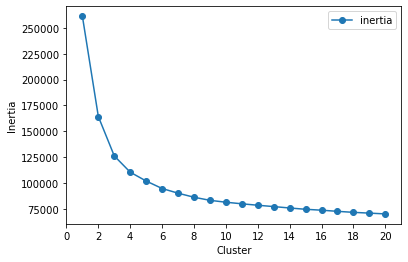

In [53]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

Given that the curve is fairly smooth, we can say that there is no ideal number of clusters so four may be an adequate cluster number to stick with.  

## Agglomerative Clustering

We now fit an Agglomerative Clustering model with four clusters using ward clustering:

In [54]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(df5[float_columns])
df5['agglom'] = ag.fit_predict(df5[float_columns])

In [55]:
df5.head(10)

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans,agglom
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,FW,3,1
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,FW,3,1
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,MD,3,1
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,GK,1,3
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,FW,3,1
5,-0.073350,-0.832290,2.184521,1.739204,-0.022568,2.190654,2.038230,1.516498,1.829469,2.030712,2.379447,1.857999,0.778554,0.701712,0.883513,3.159478,0.810286,2.275950,-0.331781,1.431952,0.486423,2.063462,0.954759,0.485948,1.801094,2.671432,1.804514,2.663626,0.849160,0.289962,0.078830,0.327189,0.099541,-1.348536,-0.302477,0.094681,MD,0,1
6,0.821389,1.288405,-1.939217,-1.749181,-2.608343,-0.090713,-1.750556,-2.062466,-1.751276,-1.893377,0.446913,-2.039044,-1.901305,-1.114384,-1.973266,2.543817,-1.531289,0.365333,1.004268,-2.187535,0.829505,-2.099443,-1.025718,-1.430260,-2.173387,0.950254,-1.629902,0.692093,-1.330057,-1.810635,-1.852251,3.184586,3.185794,3.282152,3.217070,3.194274,GK,1,3
7,1.716128,2.278063,-0.014806,0.200210,1.799228,1.160359,-0.023315,0.635522,0.493370,1.312217,1.689256,0.899710,0.572411,0.911261,-0.301005,2.790082,-0.821721,1.511704,1.922801,0.493566,2.030293,0.710518,1.314846,1.861687,-0.315189,0.591675,0.723309,2.475861,2.014788,1.877080,1.680214,0.104845,-0.310469,0.106321,-0.156003,-0.160584,DF,0,0
8,-1.415458,-1.397809,1.799639,1.226206,-0.022568,2.190654,1.703925,1.571559,1.829469,1.754368,2.172390,1.921885,0.778554,0.352463,1.858999,2.913214,2.016552,1.358854,0.085734,1.163842,-0.885906,1.647171,0.114557,1.517752,1.336544,2.456285,1.995315,2.757509,0.849160,1.130201,1.020821,0.104845,-0.472510,-0.854570,0.219637,-0.462497,MD,0,1
9,-0.968088,-0.690910,1.414757,2.149602,0.212502,1.601914,1.871078,1.681681,1.722581,1.256948,1.275142,1.730227,1.946699,1.819309,1.789321,3.282610,1.661768,1.435279,0.169237,1.163842,0.4006

In [56]:
df5.agglom.value_counts()

0    3310
1    1990
2    1298
3     662
Name: agglom, dtype: int64

In [57]:
(df5[['pos','agglom']]
 .groupby(['agglom','pos'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

count
agglom pos       
0      DF    1435
       FW     100
       MD    1775
1      DF      11
       FW    1123
       MD     856
2      DF    1210
       MD      88
3      GK     662

We can see that Agglomerative Clustering has been heavily weighted to cluster 0 which appears to be more defensively focussed. Apart from cluster 3 which contains all the goalkeepers, this method of clustering has not been as successful at clustering in a manner similar to a player's position. 

## DBSCAN Clustering 

We first fit out model using an epsilon value of 5 and a min_samples value of 4:

In [58]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=5, min_samples=4)

db = db.fit(df5[float_columns])

In [59]:
dbscan = pd.DataFrame(db.labels_).rename(columns = {0:'dbscan'})

In [60]:
df6 = pd.concat([df5, dbscan], axis = 1)
df6.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans,agglom,dbscan
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,FW,3,1,0
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,FW,3,1,0
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,MD,3,1,0
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,GK,1,3,1
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,FW,3,1,0


In [61]:
(df6[['pos','dbscan']]
 .groupby(['dbscan','pos'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

count
dbscan pos       
-1     DF       1
 0     DF    2655
       FW    1223
       MD    2719
 1     GK     662

We can see that because we don't specify the numbers of clusters for DBSCAN, as we would expect it has sorted them into two clusters containing goalkeepers and outfield players, with one additional defender that has been assigned as an outlier. 

We can see if removing the goalkeepers from the dataset allows us to seperate the outfield players in accordance to their position:

In [62]:
df_out = df5[df5['pos'] != 'GK']
df_out.reset_index(inplace = True, drop = True)

In [63]:
df_out.pos.value_counts()

MD    2719
DF    2656
FW    1223
Name: pos, dtype: int64

In [64]:
db = DBSCAN(eps=3, min_samples=3)

db = db.fit(df_out[float_columns])

dbscan = pd.DataFrame(db.labels_).rename(columns = {0:'dbscan'})

df7 = pd.concat([df_out, dbscan], axis = 1)

df7.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans,agglom,dbscan
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,FW,3,1,-1
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,FW,3,1,-1
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,MD,3,1,0
3,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,FW,3,1,0
4,-0.073350,-0.832290,2.184521,1.739204,-0.022568,2.190654,2.038230,1.516498,1.829469,2.030712,2.379447,1.857999,0.778554,0.701712,0.883513,3.159478,0.810286,2.275950,-0.331781,1.431952,0.486423,2.063462,0.954759,0.485948,1.801094,2.671432,1.804514,2.663626,0.849160,0.289962,0.078830,0.327189,0.099541,-1.348536,-0.302477,0.094681,MD,0,1,0


In [65]:
(df7[['pos','dbscan']]
 .groupby(['dbscan','pos'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

count
dbscan pos       
-1     DF     408
       FW     231
       MD     277
 0     DF    2245
       FW     986
       MD    2439
 1     MD       3
 2     DF       3
 3     FW       3
 4     FW       3

Even with trying multiple values of epsilon and min_samples, DBSCAN struggles to split the outfield player data into adequate clusters and instead either puts the majority into the same cluster or classifies many as outliers. Therefore, we can conclude that DBSCAN is not a great method for clustering this dataset. 

## Clustering to Improve Classification Models

First we change the positions into numerical values: 

In [66]:
for pos in df5['pos']:
    if pos in ['GK']:
        df5['pos'].replace(pos, 0, inplace = True)
    elif pos in ['DF']:
        df5['pos'].replace(pos, 1, inplace = True)
    elif pos in ['MD']:
        df5['pos'].replace(pos, 2, inplace = True)
    elif pos in ['FW']:
        df5['pos'].replace(pos, 3, inplace = True)
    
df5.head()

,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos,kmeans,agglom
0,-1.713704,-0.549531,1.909605,2.406101,0.858946,2.190654,2.372535,2.122169,2.257021,2.638670,2.448466,2.177429,1.740555,1.260510,1.928676,3.652007,2.158465,1.893827,0.085734,0.493566,-0.028200,2.271607,-0.725646,-0.545856,2.110793,2.671432,1.550113,3.133039,-0.924621,-0.690317,-1.098658,-1.049316,-0.162537,0.335602,0.219637,-0.636968,3,3,1
1,0.821389,1.005646,1.689673,2.354801,1.975530,1.528322,2.316817,1.681681,1.615693,1.643830,1.413180,1.921885,1.603127,1.749459,1.510611,3.775139,0.455502,2.581649,2.340317,1.163842,0.829505,2.219571,0.174571,-1.086325,2.162410,1.810843,2.186116,3.039157,-1.178018,-0.923716,-1.192858,-0.826973,-0.162537,0.335602,0.219637,-0.160584,3,3,1
2,-0.968088,-1.115049,1.854622,1.995703,0.388805,1.822692,2.316817,2.067108,1.989801,2.251788,1.689256,2.113543,1.946699,1.609759,2.137709,3.282610,1.377940,1.435279,-0.498787,0.895732,-1.657841,1.751244,-0.545602,-0.742390,1.749477,2.384569,2.504117,2.945274,-1.228698,-1.203796,-0.957360,-0.455416,-0.472510,0.335602,0.328281,-0.160584,2,3,1
3,0.970512,1.571164,-2.214133,-1.903080,-2.373272,-1.415379,-1.806274,-2.558015,-2.018496,-1.782840,-1.140526,-2.039044,-1.557734,-0.415885,0.117060,2.790082,-1.105548,-0.169640,0.920765,-1.785370,0.829505,-1.995370,-1.565848,-1.577660,-2.173387,0.591675,-2.520306,0.504328,-1.228698,-1.857315,-1.475455,3.165771,3.318834,3.077498,3.254481,3.175976,0,1,3
4,-0.968088,-0.266771,1.524723,1.841803,0.330038,1.969877,2.093948,2.012047,1.722581,1.809637,1.827295,2.049657,1.946699,1.539910,2.068032,3.036346,2.087509,1.588128,-0.916302,1.096814,-0.457053,1.543099,-0.365559,-0.496722,1.749477,2.312853,2.376917,2.663626,-0.873942,-1.157116,-1.287057,-0.151831,-0.026453,-1.083851,-0.640286,-0.636968,3,3,1


We then use K-means with four clusters to fit a Random Forest Classifier model and take the mean of the f1 scores over 10 splits:

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


y = df5['pos']
X_with_kmeans = df5.drop(['agglom', 'pos'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_f1_10splits(estimator, X, y):
    f1_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = f1_score(y_test, y_predicted, average = 'weighted')
        f1_list.append(y_scored)
    return np.mean(f1_list)

estimator = RandomForestClassifier()
f1_with_kmeans = get_avg_f1_10splits(estimator, X_with_kmeans, y)
f1_without_kmeans = get_avg_f1_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, f1 is \"{0}\"".format(f1_without_kmeans))
print("Using kmeans cluster as input to Random Forest, f1 is \"{0}\"".format(f1_with_kmeans))

Without kmeans cluster as input to Random Forest, f1 is "0.8639512420581028"
Using kmeans cluster as input to Random Forest, f1 is "0.8662824989743998"


We can see that we get a slightly higher f1 score using k-means for feature engineering

## Analysis of Results

We saw that DBSCAN did not work too well for this dataset as it automatically clustered our data into two clusters (goalkeepers and outfield players), but also did not work too well when only clustering the outfield player data as it tended to group all the players into the same cluster or classify many players as outliers. 

With K-Means Clustering and Agglomerative Clustering we were able to specify that we wanted four clusters and we could see how these compared to the four positions on a football pitch. However, it should be noted that the four positions in football are not necessarily the best way to group players based on their skill attributes since we have attacking defenders and defensive midfielders etc. We saw that this was the case with the K-Means clustering where it appeared to classify the players through goalkeepers, defensive players, attacking players, and all-round players. We also looked into whether there was a better value of k by finding the inertia of every k value between 1 and 20, and given that there was no obvious elbow point, we can conclude that the K-means method with four clusters was the best method for clustering this data. 

We also saw that using K-means clustering improved the f1 score of our classification models, proving that this model was also reliable for feature engineering. 

## Next Steps 

The main issue with attempting to cluster this data by the players' skill attributes in this way is that there may be a tendency for the models to cluster the players by how high or low their ratings are. For example, one of the best forwards in the dataset may have better defensive stats than one of the worst defenders in the dataset. Therefore, for this dataset we are more interested in the ratios between the features and therefore using the cosine similarity may be better than using the Euclidean distance. 